In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

os.environ["DATASET_DIRECTORY"] = "/content/datasets"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/input"

In [3]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 32.9MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [52]:
# prompt: rest index

df = pd.read_csv('data.csv')
df = df.reset_index(drop=True)


In [53]:
df = pd.read_csv("data.csv")
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [72]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [56]:
df = df.drop(['Unnamed: 32','id',"symmetry_se","area_se","perimeter_se","concavity_se"], axis=1)

In [57]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:

X = df.drop(["diagnosis"], axis=1)
y = df["diagnosis"]

X["diagnosis"] = y

print(X.shape)
print(y.shape)


(569, 27)
(569,)


In [59]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
                test_size=0.20,
                # Remove stratify=y
                random_state=1)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train)
print(X_test)


[[ 1.0449852   0.29708512  1.01044815 ...  0.29811854  0.08380738
   1.29478592]
 [ 1.68141074 -1.14098169  1.70338066 ... -0.88595033 -0.41234747
   1.29478592]
 [-1.44260855 -1.12732916 -1.4504636  ...  0.1807324  -0.33657109
  -0.77232845]
 ...
 [ 0.82638686  1.17539807  0.86625411 ...  0.72853438  3.02284824
   1.29478592]
 [-0.05077356  0.43133503 -0.11146165 ... -1.1207226  -0.44903285
  -0.77232845]
 [-0.32748032 -0.21260945 -0.39904866 ... -1.52732096 -1.31985978
  -0.77232845]]
[[ 2.92635643e-01 -1.30427498e+00  4.09740749e-01 ... -1.90246784e-01
   3.02591603e-01 -7.63762616e-01]
 [-1.97911946e-01 -9.58755925e-02 -1.69337819e-01 ...  1.29351802e+00
   1.43498453e+00  1.30930734e+00]
 [-2.68912255e-01 -7.77536786e-01 -3.03699185e-01 ...  5.74452130e-01
   4.67494678e-01 -7.63762616e-01]
 ...
 [-1.53433140e+00 -4.39288239e-01 -1.45570598e+00 ...  1.74708265e+00
   1.41744165e+00 -7.63762616e-01]
 [ 2.40999055e-01  7.97038058e-02  2.21918697e-01 ... -6.82530353e-01
  -4.62716551

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train) # Encode y_train
y_test_encoded = le.transform(y_test) # Encode y_test using the same encoder

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train_encoded) # Use the encoded y_train for training
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test_encoded) # Use the encoded y_test for evaluation
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.965


In [64]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []
for k, (train, test) in enumerate(kfold):
  pipe_lr.fit(X_train[list(train)], y_train.iloc[list(train)])
  score = pipe_lr.score(X_train[list(test)], y_train.iloc[list(test)])
  scores.append(score)
  print(f'Fold: {k+1:02d}, '
      f'Class distr.: {np.bincount(y_train.iloc[list(train)])}, '
      f'Acc.: {score:.3f}')

Fold: 01, Class distr.: [256 153], Acc.: 0.957
Fold: 02, Class distr.: [256 153], Acc.: 1.000
Fold: 03, Class distr.: [256 153], Acc.: 1.000
Fold: 04, Class distr.: [256 153], Acc.: 0.935
Fold: 05, Class distr.: [256 153], Acc.: 1.000
Fold: 06, Class distr.: [257 153], Acc.: 1.000
Fold: 07, Class distr.: [257 153], Acc.: 0.978
Fold: 08, Class distr.: [257 153], Acc.: 0.978
Fold: 09, Class distr.: [257 153], Acc.: 1.000
Fold: 10, Class distr.: [257 153], Acc.: 0.978


In [65]:
mean_acc = np.mean(scores)
std_acc = np.std(scores)
print(f'\nCV accuracy: {mean_acc:.3f} +/- {std_acc:.3f}')


CV accuracy: 0.982 +/- 0.021


In [66]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train_encoded, # Use the encoded y_train for cross-validation
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')


CV accuracy scores: [0.95652174 1.         1.         0.93478261 1.         1.
 0.97777778 0.97777778 1.         0.97777778]
CV accuracy: 0.982 +/- 0.021


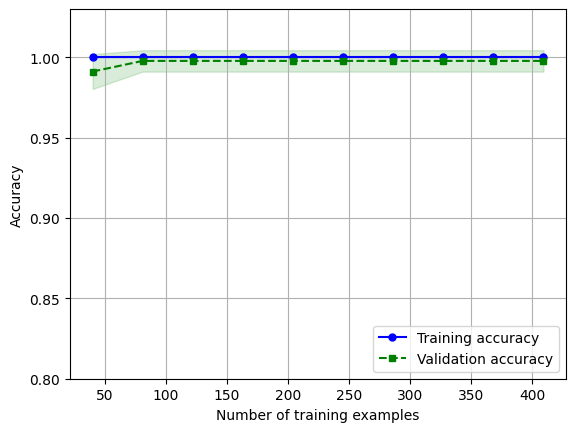

In [67]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Pipeline oluşturma
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

# Öğrenme eğrisi hesaplama
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)

# Ortalama ve standart sapma hesaplama
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Grafik ayarları
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()


In [ ]:
# Doğrulama eğrileri ile aşırı ve yetersiz uyumun ele alınması

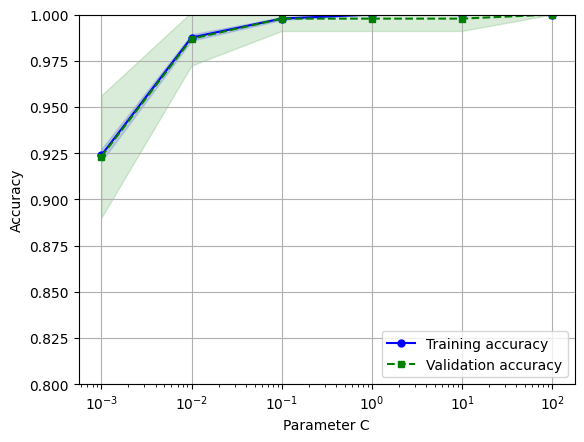

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Parametre aralığı
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Pipeline oluşturma
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))

# Validation curve hesaplama
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                             X=X_train,
                                             y=y_train,
                                             param_name='logisticregression__C',
                                             param_range=param_range,
                                             cv=10)

# Ortalama ve standart sapma hesaplama
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafik çizimi
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

# Grafik ayarları
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline oluşturma
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

# Parametre aralığı
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# Parametre grid'i
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# GridSearchCV oluşturma
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  refit=True,
                  n_jobs=-1)

# Modeli eğitme
gs = gs.fit(X_train, y_train)

# En iyi skoru ve parametreleri yazdırma
print(gs.best_score_)
print(gs.best_params_)


1.0
{'svc__C': 0.1, 'svc__kernel': 'linear'}


In [70]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Test accuracy: {clf.score(X_test, y_test):.3f}')

Test accuracy: 1.000


In [71]:
import numpy as np
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Parametre aralığı
param_range = scipy.stats.loguniform(0.0001, 1000.0)

# Rastgele örnekleme
np.random.seed(1)
print(param_range.rvs(10))

# Pipeline oluşturma
pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

# Parametre grid'i
param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# RandomizedSearchCV oluşturma
rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        n_iter=20,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

# Modeli eğitme
rs = rs.fit(X_train, y_train)

# En iyi skoru ve parametreleri yazdırma
print(rs.best_score_)
print(rs.best_params_)


[8.30145146e-02 1.10222804e+01 1.00184520e-04 1.30715777e-02
 1.06485687e-03 4.42965766e-04 2.01289666e-03 2.62376594e-02
 5.98924832e-02 5.91176467e-01]
1.0
{'svc__C': 0.05971247755848463, 'svc__kernel': 'linear'}
